In [1]:
pwd

'C:\\Users\\TEMMY'

In [3]:
import os
os.chdir("C:/Users/TEMMY/Documents/outbreak")

In [4]:
pwd

'C:\\Users\\TEMMY\\Documents\\outbreak'

In [5]:
from collections import Counter
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('dataset.csv')

In [8]:
df.drop(['Date','Time', 'ExteriorEntalpic1', 'ExteriorEntalpic2', 'ExteriorEntalpicturbo'], axis=1, inplace=True)

In [9]:
df.drop(4137,inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
x = df[['TempComedor', 'TempHabit', 'WeatherTemp', 'CO2Comedor', 'CO2Habit',
       'HumedadComedor', 'HumedadHabit', 'LightingComedor', 'LightingHabit',
       'Precipita','MeteoExterior', 'MeteoExterior.1', 'MeteoExterior.2',
       'MeteoExterior.3','MeteoExterior.4','MeteoExteriorPirametro',
       'TemperatureExteriorSensor', 'HumedadExteriorSensor', 'DayOfWeek']]
y =  df['Target']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(2895, 19)
xtest shape
(1242, 19)


In [11]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [12]:
x = df[['TempComedor', 'TempHabit', 'WeatherTemp', 'CO2Comedor', 'CO2Habit',
       'HumedadComedor', 'HumedadHabit', 'LightingComedor', 'LightingHabit',
       'Precipita', 'MeteoExterior', 'MeteoExterior.1', 'MeteoExterior.2',
       'MeteoExterior.3', 'MeteoExterior.4', 'MeteoExteriorPirametro',
       'TemperatureExteriorSensor', 'HumedadExteriorSensor', 'DayOfWeek']]
y = df['Target']
'''Incresea the outbreak samples by 4000'''

sm = SMOTE(random_state=1200,ratio={1:4000})
x_res,y_res = sm.fit_sample(x,y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0.0: 4102, 1.0: 4000})


In [15]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_res,y_res,test_size=0.30,random_state=0)
print('Xtrain shape')
print(Xtrain.shape)
print('Xtest shape')
print(Xtest.shape)

Xtrain shape
(5671, 19)
Xtest shape
(2431, 19)


In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = 0.3, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(Xtrain)
X_test = sc.transform(Xtest)

X_train

array([[ 0.21844966,  0.51824819,  0.62664555, ...,  0.30134299,
         0.08452707, -0.24158061],
       [ 0.435907  ,  0.21960128,  0.58900903, ...,  0.70543833,
        -0.3336765 , -1.13253645],
       [-0.43437242, -0.5422074 , -0.76742728, ..., -0.74969304,
         2.03062081, -0.03377431],
       ...,
       [ 1.79557579,  1.65248398,  1.99074875, ...,  2.1960602 ,
        -2.52962146,  1.06498782],
       [ 1.04278789,  0.92971556,  0.30718327, ...,  0.98484587,
         0.39004542, -1.13253645],
       [ 1.12339737,  1.03945013,  0.30718327, ...,  0.40882581,
        -0.92871182, -0.58315538]])

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()

In [25]:
# Adding the input layer 
model.add(Dense(units = 10 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 19))

# Adding the first hidden layer
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
# Fitting the ANN to the Training set
model.fit(X_train, Y_train, batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5671/5671 [==============================] - 7s 1ms/step - loss: 0.1992 - acc: 0.9549
Epoch 2/100
5671/5671 [==============================] - 3s 541us/step - loss: 0.0185 - acc: 0.9974
Epoch 3/100
5671/5671 [==============================] - 3s 478us/step - loss: 0.0104 - acc: 0.9982
Epoch 4/100
5671/5671 [==============================] - 3s 484us/step - loss: 0.0080 - acc: 0.9982
Epoch 5/100
5671/5671 [==============================] - 3s 486us/step - loss: 0.0068 - acc: 0.9986
Epoch 6/100
5671/5671 [==============================] - 3s 493us/step - loss: 0.0060 - acc: 0.9986
Epoch 7/100
5671/5671 [==============================] - 3s 492us/step - loss: 0.0052 - acc: 0.9988
Epoch 8/100
5671/5671 [==============================] - 3s 520us/step - loss: 0.0042 - acc: 0.9989 1s 
Epoch 9/100
5671/5671 [==============================] - 3s 464us/step - loss: 0.0038 - acc: 0.9988
Epoch 10/100
5671/5671 [==========================

5671/5671 [==============================] - 3s 464us/step - loss: 6.1001e-06 - acc: 1.0000
Epoch 78/100
5671/5671 [==============================] - 3s 472us/step - loss: 5.8765e-06 - acc: 1.0000
Epoch 79/100
5671/5671 [==============================] - 2s 438us/step - loss: 5.5402e-06 - acc: 1.0000
Epoch 80/100
5671/5671 [==============================] - 3s 457us/step - loss: 4.5639e-06 - acc: 1.0000
Epoch 81/100
5671/5671 [==============================] - 3s 443us/step - loss: 4.0875e-06 - acc: 1.0000
Epoch 82/100
5671/5671 [==============================] - 3s 475us/step - loss: 5.8029e-06 - acc: 1.0000
Epoch 83/100
5671/5671 [==============================] - 2s 434us/step - loss: 2.1805e-05 - acc: 1.0000
Epoch 84/100
5671/5671 [==============================] - 3s 453us/step - loss: 0.0026 - acc: 0.9998
Epoch 85/100
5671/5671 [==============================] - 4s 657us/step - loss: 5.5633e-06 - acc: 1.0000
Epoch 86/100
5671/5671 [==============================] - 4s 650us/step 

In [57]:
ypred = model.predict_classes(X_test)

In [61]:
# show the inputs and predicted outputs
for i in range(len(X_test)):
	print("X=%s, Predicted=%s" % (X_test[i], ypred[i]))

X=[-0.32462851 -0.4898237   0.03950326  1.56965169  1.81420289  0.46203058
  0.42344567  0.99761607  1.32445719 -0.14878909  0.56356144 -0.02974248
 -0.56641014  0.02280992  1.11119565  0.98587493 -0.00371787 -0.08911029
 -1.13253645], Predicted=[1]
X=[ 0.77517778  0.62017877 -0.23012201 -0.887892   -0.93352454  0.19639058
 -0.03323024 -1.274868   -1.2345842  -0.14878909 -1.83423249 -0.87330685
 -0.88600568 -0.77400587 -1.2600463  -1.4157916  -0.3525919   0.9860828
 -0.58315538], Predicted=[0]
X=[ 0.46728007  0.72934221  0.58250095  1.04651019  1.06346875 -0.00530552
 -0.2027874   0.99752386  0.72237704 -0.14878909  0.55848709  0.28717869
  0.76736281 -0.27283231  1.10627659  0.77814204  0.40949883  0.15859022
 -0.03377431], Predicted=[1]
X=[-0.73091736 -0.68614201 -0.23012201 -0.9407048  -0.99376074  2.01132109
  1.72358692  1.00535096  0.73837946 -0.14878909  0.55541515  1.51329494
  0.61413071 -0.29520728  0.44015921  1.14150827 -0.10947217  0.62671111
  1.06498782], Predicted=[0]
X

 -0.86246762], Predicted=[1]
X=[-0.66043507 -0.6957301  -0.23012201 -0.81300695 -0.90146481 -1.20764529
 -1.43771184 -0.7309117  -0.14408249 -0.14878909  0.54587978  1.30083168
 -0.47499501  3.42741291 -0.71525609 -0.486608   -0.38238844 -0.36387156
 -0.03377431], Predicted=[0]
X=[ 0.84888741  0.75154316  0.6116473  -0.91500627 -0.9593164  -0.81090274
 -0.51385244 -1.26849201 -1.22581282 -0.14878909 -1.4312313  -0.40781637
 -0.88600568 -0.77400587 -1.2600463  -1.41705049  0.65272745 -1.43167352
 -1.13253645], Predicted=[0]
X=[ 0.35725493  0.2829724  -0.76742728 -0.81450547 -0.84114582 -0.0270634
  0.6322617  -1.27113675 -1.22874594 -0.14878909 -1.83406297 -1.69428137
 -0.88600568 -0.77400587 -1.2600463  -1.41624831 -0.42687383  1.80135278
  1.61436889], Predicted=[0]
X=[ 0.65189528  0.59871946  0.70598798  0.61611298  0.12500266  0.2194342
  0.04720757  0.53060779  0.20562067 -0.14878909  0.55412502  0.35130261
  1.74166016 -0.25008316  0.59781457  0.60737197  0.86635344 -0.24029197
 -

  2.16374996], Predicted=[0]
X=[-2.21794519 -2.38179968 -2.91664839 -0.78015521 -0.8383141   1.02614972
  1.27992563 -1.26584403 -1.25894891 -0.14878909 -1.83423249 -1.04245236
 -0.88600568 -0.77400587 -1.2600463  -1.41666793 -2.30198989  1.16801968
  1.06498782], Predicted=[0]
X=[-0.2998819  -0.20258339  0.21537622  1.10201255  1.21095653  0.30629977
  0.11740367  0.99982631  1.30636156 -0.14878909  0.56282135  0.09452264
 -0.55372012 -0.02756039  1.11072012  0.9416285  -0.01852614 -0.02062191
 -0.77089616], Predicted=[1]
X=[-0.606275   -0.71558575 -0.49877465 -0.87111841 -0.90420546 -0.20186028
 -0.2058993  -1.27113675 -1.26382745 -0.14878909 -1.83423249 -0.74060292
 -0.88600568 -0.77400587 -1.2600463  -1.41724175 -1.27787665 -0.04310456
  2.16374996], Predicted=[0]
X=[-1.85095506 -2.03957277 -2.64799575 -0.80197082 -0.84882955  1.30073742
  1.39214584 -1.27113675 -1.25407037 -0.14878909 -1.82474463 -1.60627073
 -0.88600568 -0.77400587 -1.2600463  -1.41685922 -2.14337284  1.23359708


  1.06498782], Predicted=[0]
X=[ 0.44845886  0.70324098  0.57583591  1.06385324  1.04882981  0.01246894
 -0.18982812  0.99949234  0.72197883 -0.14878909  0.55866129  0.27601097
  0.70114309 -0.27345556  1.09211179  0.78992856  0.40477632  0.14209408
 -0.07210981], Predicted=[1]
X=[ 0.09684561 -0.08465357  0.42009698  2.34253358  2.44452189  0.46085834
  0.41837135  0.9888491   1.27746052 -0.14878909  0.56006449  0.20044413
 -0.24738794 -0.16606214  1.01765666  0.98954424  0.3597852  -0.20278819
 -1.13253645], Predicted=[1]
X=[ 0.42943452  0.22302348  0.59444293  1.97892609  1.39601798  0.40175247
  0.2751706   0.99261248  0.72310554 -0.14878909  0.55865719  0.09970179
  0.63608096 -0.25123682  0.80633827  0.88285599  0.67255537 -0.30342097
 -1.09029328], Predicted=[1]
X=[-2.61438949 -2.64856755 -2.03904888 -0.85469255 -0.90685502 -1.16619457
  0.31691965 -0.94689502 -1.05714329  7.209783    0.52262119  1.0539927
 -0.73736455 -0.50210068 -1.145573   -1.14397886 -2.16049119  2.4928557
 -

  1.06498782], Predicted=[0]
X=[ 0.05553851  0.13483895  0.4212419   1.73188352  1.96325416  0.2169118
  0.13682437  0.99795562  1.07468069 -0.14878909  0.56050431  0.10520254
 -0.26051577 -0.19003499  1.08055452  0.9373243   0.22826766 -0.01673247
 -0.66604817], Predicted=[1]
X=[-0.44757386 -0.61641136  0.03853063  1.47899359  1.38869526  0.47245013
  0.37966501  1.00185571  1.32215061 -0.14878909  0.5636329  -0.1135705
 -0.57856725  0.12055641  1.11181357  0.96175511 -0.10776064 -0.05984126
 -1.13253645], Predicted=[1]
X=[-2.16230128 -2.36670032 -2.37934311 -0.78686962 -0.8260433   0.2475243
  0.41695548 -0.95806276 -0.55510751 -0.14878909  0.5524563  -1.69428137
 -0.42285772  3.42616368  0.19159502 -0.47093043 -2.32117473  0.86470561
  1.06498782], Predicted=[0]
X=[ 0.48089569  0.32072079 -0.23012201 -0.89398547 -0.9520715  -0.3245179
 -0.21155925 -1.27378148 -1.2706654  -0.14878909 -1.83423249 -1.18134454
 -0.88600568 -0.77400587 -1.2600463  -1.41838939 -0.04485247 -0.56960788
  2.

 -1.13253645], Predicted=[1]
X=[ 0.52541082  0.32374066  0.57583591 -0.76337334 -0.79521727 -0.7972348
 -0.58606157 -1.27432474 -1.27391843 -0.14878909 -1.83423249 -0.91318703
 -0.88600568 -0.77400587 -1.2600463  -1.41838939 -0.22656395 -0.97842293
  0.51560676], Predicted=[0]
X=[ 0.53297455  0.37458432  0.59519151  1.34164194  0.48497666  0.60301517
  0.28738609  0.87628993  0.66395382 -0.14878909  0.55605812  0.3371987
  1.38255656 -0.25227834  0.58338449  0.75551603  0.85625149 -0.41049912
 -1.05337399], Predicted=[1]
X=[ 0.7116539   0.81781826  0.84448854  0.40927091 -0.02094134 -0.01976385
 -0.20228778  0.48606381  0.12977012 -0.14878909  0.55329804  0.22617194
  1.90278997 -0.24858899  0.77204112  0.52114762  0.75400727  0.03096054
 -0.03377431], Predicted=[1]
X=[ 0.93563008  0.36774216  0.57583591  0.16413881 -0.03683412 -0.21933521
 -0.26252411 -0.53789312  0.1162551  -0.14878909  0.55397754  0.68987115
  1.88790521 -0.23677749  0.1868211   0.5877482   1.02253394 -0.87992508
 -

X=[ 0.28105987  0.06905228 -1.30473256 -0.76187481 -0.80201506 -1.04228934
 -0.69914627 -1.26903202 -1.25148514 -0.14878909 -1.83439944 -1.24047636
 -0.88600568 -0.77400587 -1.2600463  -1.41762431 -0.61509195 -1.16816404
  0.51560676], Predicted=[0]
X=[-0.80262381 -0.9043277  -1.5733852  -0.72028028 -0.76262763  0.96954137
  1.17467025 -1.26794875 -1.258629   -0.14878909 -1.83423249 -0.88843403
 -0.88600568 -0.77400587 -1.2600463  -1.41762431 -0.89211328  1.01543545
 -0.58315538], Predicted=[0]
X=[-1.80421418 -1.80553276 -0.14058008 -0.76435029 -0.83972996  0.92285811
  1.10463049  1.06087085  1.32230475 -0.14878909  0.55870148  0.7452609
 -0.56008569 -0.17670909  1.10527873  1.00935119 -0.63184727  0.36888374
  0.51560676], Predicted=[0]
X=[ 0.64904214  0.44176538  0.57583591  0.72103893  0.11201073  0.47678062
  0.28959312  0.16413802  0.17174751 -0.14878909  0.55381781  0.69376161
  1.75368818 -0.24881412  0.33670457  0.63122125  1.03451673 -0.56423493
 -1.13253645], Predicted=[1]
X

X=[ 0.88598335  0.8210002   1.65044646 -0.78836815 -0.81605775 -0.52661341
 -0.26853384  1.00205562  0.83700995 -0.14878909  0.56856433 -0.03995584
 -0.5469037   2.85404542  0.22530104  0.99161256  1.37879143 -0.42944896
  0.51560676], Predicted=[0]
X=[ 1.14465334  1.07115878  0.03853063 -0.85036254 -0.84202349 -0.89507041
 -0.45382767 -1.26530402 -1.23620971 -0.14878909 -1.83423249 -1.18615693
 -0.88600568 -0.77400587 -1.2600463  -1.41601995  0.09756777  0.6113803
  1.06498782], Predicted=[0]
X=[ 0.59092279  0.39020726  0.57583591  0.8416956   0.28699819  0.45088105
  0.28493468  0.60434704  0.29358196 -0.14878909  0.55497298  0.45552157
  1.57251872 -0.25186589  0.44404793  0.69475318  0.96433433 -0.49144794
 -1.13253645], Predicted=[1]
X=[ 0.65953946  0.80168069  0.83840974  0.63000568  0.39072663 -0.05459674
 -0.16078485  0.99150996  0.1468046  -0.14878909  0.55386873  0.00640952
  1.67122841 -0.25781482  0.90391279  0.6059409   0.65824082  0.08066221
 -0.03377431], Predicted=[1]
X

X=[ 0.55759045  0.77533831  0.62519449  1.07068173  1.09535507  0.00916463
 -0.17898749  0.98692925  0.69556038 -0.14878909  0.55723189  0.38376942
  1.13396913 -0.26586742  1.09649315  0.7292672   0.49664977  0.14755212
 -0.03377431], Predicted=[1]
X=[ 0.526755    0.34411972  0.57583591  1.36653839  0.48214909  0.64275906
  0.32004384  0.85252224  0.68212092 -0.14878909  0.55616465  0.36882622
  1.37099877 -0.25186589  0.55244464  0.7633043   0.87651393 -0.45090799
 -1.13253645], Predicted=[1]
X=[-0.77357611 -0.71001271  0.12200218  0.79104487  0.89002131  0.40264557
  0.23767251  1.01054221  1.2274716  -0.14878909  0.5636329   0.09061741
 -0.56773409  0.60065953  1.11025619  0.85893744 -0.35951829  0.04530995
 -0.96184135], Predicted=[1]
X=[ 0.55044578  0.47594208  0.63673204  1.21496354  0.62298262  0.44638298
  0.17585675  0.90594714  0.60263428 -0.14878909  0.55547359  0.3936204
  1.37655566 -0.25515207  0.70142969  0.73994221  0.7816193  -0.27315351
 -0.79289505], Predicted=[1]
X

 -1.13253645], Predicted=[1]
X=[-0.4245049  -0.57618095 -0.6420471  -0.79746695 -0.84988938  1.3498973
  1.25077774 -1.26849201 -1.26741437 -0.14878909 -1.83253731 -1.69428137
 -0.88600568 -0.77400587 -1.2600463  -1.41819813 -0.55739779  0.74438947
  1.61436889], Predicted=[0]
X=[ 0.68614753  0.61413903 -0.76742728 -0.83764574 -0.85845079 -0.07374666
  0.55440893 -1.27168001 -1.23069136 -0.14878909 -1.83423249 -1.592519
 -0.88600568 -0.77400587 -1.2600463  -1.41647667 -0.26362113  1.65802059
  1.61436889], Predicted=[0]
X=[-2.94331919 -3.00842295 -2.11069047 -0.85990014 -0.92336512 -0.86924285
  1.07941356 -1.27432474 -1.25732339  7.209783   -1.83168973  2.36727345
 -0.88600568 -0.77400587 -1.2600463  -1.41647667 -2.45669737  2.81044943
 -0.58315538], Predicted=[0]
X=[-0.04189738 -0.30941308 -0.49877465 -0.84099881 -0.87814864  0.48935738
  0.64880113 -0.96541466 -1.06991347 -0.14878909  0.53322375 -0.03720207
 -0.7635418  -0.64275528 -1.20218649 -1.3161089  -0.31313311  0.40273846
  1

X=[ 1.43993702  1.39024592  2.18775173 -0.74421535 -0.81323431 -1.01052163
 -1.44271934 -0.06646551 -0.47203836 -0.14878909  0.55870148  1.31251716
  2.03890969 -0.26249688 -0.11271785  0.47540921  2.79218665 -2.06394557
  1.06498782], Predicted=[0]
X=[ 1.4775523   1.4154241   0.03853063 -0.90344028 -0.94465272  1.75758909
  1.29080512 -0.96222667 -1.03051126 -0.14878909  0.53083895  0.39391269
 -0.80701854 -0.62762706 -1.19862589 -1.26548807  0.37551064  1.94494279
  1.61436889], Predicted=[0]
X=[ 0.48004728  0.44993175  0.60151265  1.61567821  1.27939161  0.24145695
  0.0874936   0.99007644  0.72394296 -0.14878909  0.55820203  0.21353558
  0.83004757 -0.257376    0.92845599  0.82165345  0.59708184 -0.11701782
 -0.65614236], Predicted=[1]
X=[ 0.45180967  0.62740777  0.57583591  1.20190096  1.03185666  0.11765964
 -0.10328747  0.99674356  0.72311734 -0.14878909  0.55846607  0.3212235
  0.75797124 -0.26909011  1.02024142  0.79805753  0.47001961  0.05264338
 -0.25831843], Predicted=[1]
X

 -3.87052966e-02  1.12656815e-01 -6.32359903e-02], Predicted=[1]
X=[ 0.43200525 -0.03029595  0.28802635 -0.1087678   0.06727294 -0.12755299
  0.01946943 -0.57694468 -0.3143193  -0.14878909  0.54949626  0.96563837
  1.93687836 -0.28477533 -0.24186664  0.21902642  0.66984368 -0.71617774
  0.16241102], Predicted=[1]
X=[ 0.37784172  0.39958796  0.71701817  1.75533131  1.51849915  0.23688639
  0.08471354  0.99736913  0.7244343  -0.14878909  0.55870148  0.39172786
  0.46263696 -0.25501559  0.9974886   0.86729126  0.4882022  -0.07504036
 -0.61119548], Predicted=[1]
X=[-0.54766342 -0.61543927  0.57583591 -0.76249575 -0.82224283 -0.34239422
 -0.59389089  1.01116417  1.31590666 -0.14878909  0.56478485  0.33959017
 -0.56345502  0.67825966  1.11152022  0.95688769  0.02197334 -0.68781181
  0.51560676], Predicted=[0]
X=[ 0.41709068  0.1727471   0.30718327 -0.78686962 -0.85059317  0.60207129
  0.91411711 -0.63609817 -0.99737517 -0.14878909  0.54653859  0.62631242
  2.02451461 -0.32178448 -0.65199677 

 -1.13253645], Predicted=[1]
X=[ 0.28588864 -0.12241545  0.27248882 -0.09940239 -0.06285426 -0.21630884
  0.03809819 -0.78015261 -0.31500904 -0.14878909  0.55030305  0.77336789
  1.86132913 -0.28669593 -0.13352694  0.30596983  0.64006856 -0.92507134
  0.17300217], Predicted=[1]
X=[ 2.08789179  2.25090921  1.79371891 -0.68928309 -0.74355076 -1.79508719
 -1.87311972  1.37671969  0.73943915 -0.14878909  0.5629741   2.21806443
 -0.37687795 -0.17875692  0.11102444  1.19946989  2.43772781 -1.72374235
  1.61436889], Predicted=[0]
X=[-1.38180271 -1.56643446 -2.41516257 -0.77892162 -0.79424852 -0.08367174
 -0.06019245 -0.96600021 -1.05714329 -0.14878909  0.52656633 -1.6544015
 -0.70026095  1.08044288 -1.08255012 -1.24808992 -1.9946135   0.17161606
  0.51560676], Predicted=[0]
X=[ 1.96757237e-01  7.82119747e-03  8.07184808e-01  2.37160426e+00
  2.25011539e+00  4.68288409e-01  4.07171624e-01  9.81350398e-01
  8.57725783e-01 -1.48789090e-01  5.58972392e-01 -1.89192184e-03
 -6.33376561e-02 -1.95840

 -1.13253645], Predicted=[0]
X=[-0.64878695 -0.7226447  -0.23012201 -0.80912402 -0.89925408 -1.53885996
 -1.83919268 -1.26530402 -1.22128018 -0.14878909 -1.81746824  0.78514417
 -0.88600568 -0.77400587 -1.2600463  -1.41533488 -0.65494169 -0.47837666
 -0.03377431], Predicted=[0]
X=[-0.66567291  0.35494588  0.50716175 -0.23287763  1.22041505 -0.28346201
 -0.41763449  1.0088049   0.802783   -0.14878909  0.5636329   0.19805337
 -0.57830354  0.27523771  1.11027006  0.79094417 -0.26860963  0.03615358
 -0.17420949], Predicted=[1]
X=[-0.98227589 -0.42631105  0.29776511 -0.22129079  0.45837644  0.07673652
 -0.14266673  0.97706609  1.05019504 -0.14878909  0.56442661  0.11655808
 -0.54948221  1.30461897  1.1108267   0.72072118 -0.52906449  0.11624476
 -0.60241503], Predicted=[1]
X=[-0.90173361 -0.48026277  0.24858695  0.21474884  0.76129534  0.17266816
 -0.02448555  1.00831536  1.10707637 -0.14878909  0.56417514  0.17081244
 -0.55668944  0.99637788  1.11066917  0.76939441 -0.46849997  0.09236264


X=[-0.48733495 -0.49282179  0.11541967  1.20886093  1.10471407  0.37181576
  0.19738746  1.00273595  1.32207695 -0.14878909  0.5636329  -0.06774947
 -0.5816682   0.13626622  1.11155779  0.93486557 -0.14006677 -0.03794621
 -0.97530224], Predicted=[1]
X=[-0.18089587 -0.28929319 -1.03607992 -0.79499148 -0.86887517 -2.15261357
 -2.35287743 -1.26476076 -1.24268777 -0.14878909 -1.83423249 -1.69428137
 -0.88600568 -0.77400587 -1.2600463  -1.41647667 -0.85433003 -1.23096483
 -0.03377431], Predicted=[0]
X=[ 1.09965596  1.04397994  0.39672519 -0.83455761 -0.85509743 -2.08086622
 -2.14931519  1.00465806  1.35535486 -0.14878909  0.56478485 -0.27235557
 -0.49795473  3.77149273  0.23879735  0.77776232  0.78453599 -1.90528257
 -0.58315538], Predicted=[0]
X=[ 2.26388067  2.12517532  1.68248354 -0.58828924 -0.05967872 -1.02686137
 -0.76781469  0.09819306 -0.50560147 -0.14878909  0.55304438  1.61833579
  1.84953435 -0.29732285 -0.5566401   0.65951934  2.24303013 -1.4070426
  0.41883338], Predicted=[1]
X

 -0.21447304], Predicted=[1]
X=[-0.1549981  -0.33060225  0.12484132  1.81186432  2.07882744  0.44895409
  0.44438925  1.00194578  1.32405092 -0.14878909  0.56078762  0.12255422
 -0.49635107 -0.11818176  1.07965596  0.99283595  0.12896396 -0.11055717
 -1.13253645], Predicted=[1]
X=[-1.0870045  -1.21762909  0.03853063  0.20780093  0.06379324  0.55116631
  0.32775969  0.95665648  1.32414458 -0.14878909  0.56359762  0.36752328
 -0.53984077  1.71713073  1.11040576  0.75974393 -0.60541097  0.10527028
 -1.13253645], Predicted=[1]
X=[-0.72110667  0.35668909  0.52906072 -0.36371762  1.10894773 -0.31080081
 -0.46059311  1.01047566  0.77797484 -0.14878909  0.5636329   0.2177216
 -0.57859735  0.34148674  1.1100511   0.77234802 -0.31240347  0.05352876
 -0.1294272 ], Predicted=[1]
X=[-0.13812425 -0.12572941 -0.23012201 -0.80859415 -0.85907178 -0.16163856
  0.78972883 -0.82672718 -0.49795061 -0.14878909  0.54637293  0.8566494
 -0.27245094  0.48620357 -0.5784103  -0.40722475  0.4564947   0.48682985
 -

  1.06498782], Predicted=[0]
X=[-0.82313787 -0.9687642  -0.76742728 -0.77945148 -0.79530835  1.58079975
  2.01718631 -0.96222667 -1.09022739 -0.14878909  0.53421004 -1.65715187
 -0.73918544 -0.35572187 -1.11601994 -1.15322233 -0.83050954  1.8912552
 -0.58315538], Predicted=[0]
X=[ 2.32115426  2.17846346  1.70555132 -0.61756374 -0.04749686 -1.05257939
 -0.78090423  0.16247923 -0.52501377 -0.14878909  0.55291423  1.7230626
  1.86955426 -0.29796664 -0.59532609  0.64692225  2.2786056  -1.42136246
  0.42826788], Predicted=[1]
X=[-0.14558044 -0.21026678  0.17706368  1.56372512  1.87903096  0.3406669
  0.30084619  1.00335684  1.23705275 -0.14878909  0.56092072  0.18572755
 -0.47899799 -0.12048578  1.08882549  0.96959274  0.1074388  -0.05122664
 -0.95248965], Predicted=[1]
X=[-0.70898525  0.47551877  0.57583591 -0.48766587  1.0788161  -0.38598011
 -0.55446575  1.01011383  0.75346224 -0.14878909  0.5636329   0.23544664
 -0.58017611  0.30282273  1.11003361  0.76423979 -0.30262255  0.05462884
 -0

 -1.13253645], Predicted=[0]
X=[-0.2001411  -0.37597771  0.07047665  1.70271135  1.96728285  0.44571571
  0.43586027  1.0027199   1.32169033 -0.14878909  0.56128555  0.16412442
 -0.52278038 -0.0910283   1.0879678   0.9900884   0.09144447 -0.0971124
 -1.13253645], Predicted=[1]
X=[-1.0885892  -0.90314698  0.15712785 -0.07230655  0.09404872  0.31784233
  0.08088542  0.95699967  1.19423814 -0.14878909  0.56443141  0.18427911
 -0.53871225  1.74033563  1.11085369  0.71654808 -0.61618378  0.11863257
 -0.89001113], Predicted=[1]
X=[-0.66084065 -0.85820791 -0.23012201 -0.56863095  0.02478939 -0.13557051
  0.53106669 -0.96121336 -1.0548756  -0.14878909  0.54319406  1.16575515
  1.90377572 -0.3694892  -0.79997117 -0.26723174  0.02424413 -0.80964711
  0.51560676], Predicted=[1]
X=[ 0.44156467  0.71579007  0.57583591  1.04410647  1.06968377  0.00471565
 -0.20602437  0.99989668  0.72184995 -0.14878909  0.55878304  0.26994733
  0.66491603 -0.27344048  1.10687426  0.79058933  0.38689402  0.16106803
 

 -0.58315538], Predicted=[0]
X=[ 0.51810277  0.44830973  0.64480951  1.48454908  0.93800942  0.39106699
  0.14401915  0.98678382  0.60406194 -0.14878909  0.55622628  0.50796977
  1.16169502 -0.2534623   0.80085968  0.78102982  0.7080228  -0.1971414
 -0.74784384], Predicted=[1]
X=[ 0.13071003  0.00212438 -1.16146011 -0.77291094 -0.81985822  0.38358916
  0.14728445 -1.27113675 -1.25994861 -0.14878909 -1.83423249 -0.88637128
 -0.88600568 -0.77400587 -1.2600463  -1.41838939 -0.68286723  1.35074987
 -0.03377431], Predicted=[0]
X=[ 0.53924761  0.3076221  -0.49877465 -0.76876308 -0.82330266  0.79822665
  0.65271579 -1.28443198 -1.26708047 -0.14878909 -1.83406297 -1.56089054
 -0.88600568 -0.77400587 -1.2600463  -1.41896321 -0.04057987  0.63464426
 -1.13253645], Predicted=[0]
X=[-1.0036838  -1.03973117 -0.23012201 -0.92966868 -0.99349578  0.65819549
  0.37128447 -0.53399454  0.09131308 -0.14878909  0.5542632   1.06980368
 -0.27722072  0.17323468 -0.31591018  0.03836952 -0.12100541 -0.64100623
 

 -1.13253645], Predicted=[0]
X=[ 0.38593883  0.16946605  0.68183064  2.15163222  1.59425382  0.43200137
  0.31283792  0.99359057  0.72437254 -0.14878909  0.55870148  0.23474929
  0.49097847 -0.2460433   0.83107272  0.90631853  0.64328031 -0.3096694
 -1.13253645], Predicted=[1]
X=[-0.6282729  -0.78783617  0.03853063  1.34928772  1.20723259  0.51915124
  0.39912747  1.00465806  1.32454408 -0.14878909  0.5636329   0.11062491
 -0.57506539  0.33300477  1.1109763   0.92103861 -0.25057991  0.00501991
 -1.13253645], Predicted=[1]
X=[ 0.77993622  0.38024066  0.57583591  0.4016676  -0.01773872  0.0874224
 -0.02895025 -0.38452694  0.13418266 -0.14878909  0.55392307  0.59551078
  1.82511742 -0.24227087  0.26951922  0.6185276   1.02154236 -0.75404955
 -0.48919124], Predicted=[1]
X=[ 0.01376969  0.15663828  0.5487573   1.52301658  1.66254733  0.17930892
  0.04439229  0.99862739  1.16004267 -0.14878909  0.56018091  0.39934375
 -0.33717597 -0.17710211  1.05873306  0.93736694  0.21292768 -0.0415228
 -0

  2.16374996], Predicted=[0]
X=[ 1.48890366  1.43354332  0.84448854 -0.81433161 -0.88892078 -3.15791443
 -2.78544719 -1.26584403 -1.10403526 -0.14878909  0.53651008 -0.81898743
 -0.86415337 -0.75683291 -1.258266   -1.3839895   1.10026211 -2.6347357
 -0.03377431], Predicted=[0]
X=[ 0.63393746  0.78573548  0.78829472  0.71854586  0.70674647 -0.01812524
 -0.16254338  0.87817775  0.32063378 -0.14878909  0.55366368  0.41224937
  1.52298504 -0.25940984  0.96526028  0.64383586  0.61938763  0.09933634
 -0.03377431], Predicted=[1]
X=[ 0.37146814  0.5250802   0.58135943  1.43380233  1.35519277  0.27720144
 -0.03513596  0.99603892  0.72331451 -0.14878909  0.55961028  0.24796189
  0.39388052 -0.2568622   1.01021929  0.84526092  0.43070243  0.01813528
 -0.37246487], Predicted=[1]
X=[ 0.58447847  0.68057273  0.7353559   1.00478124  0.91941908  0.1016734
 -0.06469419  0.99065032  0.44075288 -0.14878909  0.55448916  0.47446937
  1.34144612 -0.25985184  0.95581561  0.70857572  0.61835667  0.02625397
 -

 -0.60528686], Predicted=[1]
X=[-0.73314312 -0.82834019 -0.51669378 -0.75790082 -0.79247663  1.93287012
  1.95585666 -0.96335548 -1.01782105 -0.14878909  0.5407827  -0.72410092
 -0.60260848 -0.14890662 -0.98643916 -0.9158572  -0.60523423  1.81430364
 -0.03377431], Predicted=[0]
X=[-0.76578754 -0.88722768 -1.30473256 -0.82722227 -0.87823972  0.86872638
  1.21773149 -0.95747721 -1.06108811 -0.14878909  0.52788009 -1.69428137
 -0.8331958  -0.65624866 -1.21767522 -1.32399804 -1.08703353  2.07081213
 -0.58315538], Predicted=[0]
X=[ 0.00903534 -0.08518764 -1.30473256 -0.80214468 -0.81102358 -0.78954426
  0.11857695 -1.27378148 -1.2706794  -0.14878909 -1.83423249 -1.617272
 -0.88600568 -0.77400587 -1.2600463  -1.41762431 -0.73760128  1.48058578
 -1.13253645], Predicted=[0]
X=[-0.61730521 -0.51422739  0.16263863  0.96749273  0.90884122  0.34314781
  0.11259249  1.0041967   1.32454408 -0.14878909  0.5636329   0.15461873
 -0.57785208  0.28286036  1.11078813  0.8937728  -0.24137532  0.01723526
 -

 -1.13253645], Predicted=[0]
X=[-0.90972487 -1.04847268  0.03853063  0.67671548  0.50507184  0.54894511
  0.35729818  0.98584683  1.32062543 -0.14878909  0.5636329   0.17527684
 -0.5548017   1.09897591  1.11034859  0.82790247 -0.46658684  0.06934935
 -1.13253645], Predicted=[1]
X=[-0.62733825  0.0752207   0.38211151  0.20949005  1.19511813 -0.08010009
 -0.21212239  1.00768477  0.94097244 -0.14878909  0.5636329   0.10192692
 -0.58017391  0.24967647  1.11066333  0.83252089 -0.2425511   0.01538028
 -0.4299309 ], Predicted=[1]
X=[-0.38369937 -0.52586234  0.07434203 -0.89831547 -0.95578089 -0.15767226
 -0.26158532  1.01307046  0.763332   -0.14878909  0.56543981 -0.88430853
 -0.53874236  3.77336372  0.0088856   0.85295903  0.20943747 -0.66030362
 -0.58315538], Predicted=[0]
X=[ 1.31332858  1.22668215  0.84448854 -0.93293067 -0.98475222 -0.95689268
 -0.97035055 -1.27751273 -1.26350754 -0.14878909 -1.83423249 -0.05645784
 -0.88600568 -0.77400587 -1.2600463  -1.41877195  0.80760248 -1.34308999


 -0.03377431], Predicted=[0]
X=[ 0.33924301  0.52478181  0.64549591  1.4941189   1.48945345  0.27809908
 -0.04406295  0.99680378  0.72433045 -0.14878909  0.55967459  0.36709994
  0.28489904 -0.25390986  1.05251707  0.85510229  0.3860371   0.05095021
 -0.31867668], Predicted=[1]
X=[-1.0457135  -1.03116229 -1.5733852  -0.92701934 -0.96478941  0.46204013
  1.07853276 -1.25736657 -1.22517301 -0.14878909 -1.83423249 -0.65878085
 -0.88600568 -0.77400587 -1.2600463  -1.41442146 -1.85797384  2.20064804
 -1.13253645], Predicted=[0]
X=[-0.74059485 -0.88925583  0.03853063  1.1179348   0.9466175   0.54059459
  0.38597927  1.00890284  1.32101849 -0.14878909  0.5636329   0.07746615
 -0.56818561  0.56389269  1.11048829  0.88912238 -0.33593895  0.03280462
 -1.13253645], Predicted=[1]
X=[ 2.20611655  2.14321305  1.38179382 -0.82713948 -0.84891235 -2.08209522
 -2.12713212 -0.97181342 -1.03896273 -0.14878909  0.53897579  1.41428293
 -0.81066066 -0.62967146 -1.20610325 -1.31362245  1.62154812 -1.78139652


X=[-0.19800587  0.02557348  0.42690536  0.97359416  1.17187287  0.11692207
 -0.03888925  1.00433795  1.12443692 -0.14878909  0.56180715  0.31801459
 -0.49475374 -0.09115328  1.10941474  0.92258367  0.01437029  0.04554927
 -0.5514025 ], Predicted=[1]
X=[ 0.27721959  0.12390771  0.39189065 -0.58679365  0.10973292 -0.28347962
  0.13171919 -0.6040563  -0.93220001 -0.14878909  0.54519225  1.21023204
  1.88541439 -0.35612362 -0.83108447 -0.06222005  0.70739153 -0.725424
  0.51560676], Predicted=[1]
X=[-0.54180227  0.02561218  0.38375845  0.32735357  0.41155831  0.01359111
 -0.40802404  1.00269209  1.32351483 -0.14878909  0.5636329   0.14721612
 -0.58485137  0.12440386  1.11074409  0.85800949 -0.18125065  0.01791716
 -0.42656301], Predicted=[1]
X=[ 0.20193423 -0.05525317 -0.49877465 -0.83879655 -0.89501478 -1.33998591
 -1.65977084 -0.97131245 -1.061462   -0.14878909  0.53683756  0.26876564
  1.09329648 -0.39579188 -1.01652646 -0.85646688 -0.46113846 -0.60318494
 -1.13253645], Predicted=[0]
X=

  0.51560676], Predicted=[0]
X=[-0.73278578  0.47646211  0.57583591 -0.5030076   1.11853513 -0.39850473
 -0.55549315  1.01087045  0.73127001 -0.14878909  0.5638873   0.17320912
 -0.57731104  0.37280765  1.11021611  0.75204462 -0.32400378  0.06449126
 -0.03377431], Predicted=[1]
X=[-0.77313292 -0.9222475   0.03853063  1.05452006  0.92608507  0.53737238
  0.38494021  1.00493217  1.32744252 -0.14878909  0.56355785  0.23117047
 -0.56477343  0.7177183   1.11066913  0.87384438 -0.36427224  0.03676713
 -1.13253645], Predicted=[1]
X=[-2.15762719 -2.17871334 -0.23012201 -0.78739948 -0.84988938  0.8880924
  1.02547283  1.02157395  1.33030235 -0.14878909  0.56823685 -0.85130453
 -0.61490034  0.26719494  1.11233238  0.9340286  -0.88245104  0.33027905
  0.51560676], Predicted=[0]
X=[-0.34931143 -0.4541404  -1.5733852  -0.90979868 -0.95216257 -0.02011771
  0.05158736 -1.27113675 -1.21965466 -0.14878909 -1.83423249 -1.69428137
 -0.88600568 -0.77400587 -1.2600463  -1.41533488 -1.21325696  0.40854949
 

  1.06498782], Predicted=[0]
X=[ 1.63383749  1.5724574   2.18775173 -0.92100867 -0.97777227 -0.96309352
 -0.96165674 -0.96864494 -1.06863385 -0.14878909  0.54883864  2.53572793
  1.33816201 -0.36021909 -1.05050469 -0.64124943  1.95254952 -2.56281178
 -0.58315538], Predicted=[0]
X=[ 0.77272945  0.75358158  1.23852137 -0.88251055 -0.94889202  0.02407032
 -0.29854622  1.00274852  0.76353194 -0.14878909  0.55557696  1.73950642
 -0.12769994 -0.28253189 -0.23072742  1.38409047  1.60889785 -1.73181433
 -0.58315538], Predicted=[0]
X=[-3.19060072 -3.25254178 -2.11069047 -0.87924027 -0.91188919 -0.57255182
  1.70314914 -1.27113675 -1.25700349  7.209783   -1.83202876  4.82538047
 -0.88600568 -0.77400587 -1.2600463  -1.41624831 -2.47736226  3.20181155
 -0.58315538], Predicted=[0]
X=[ 0.38296241  0.23061539 -1.30473256 -0.76734734 -0.78735966 -1.24911462
 -1.16021148 -1.26903202 -1.26057642 -0.14878909 -1.83423249 -1.69428137
 -0.88600568 -0.77400587 -1.2600463  -1.41724175 -0.56130736 -0.70209148


X=[ 2.1709867   2.24135886  3.26236229 -0.76593989 -0.8187984  -0.64629164
 -0.43208501  0.98644096  0.77270919 -0.14878909  0.55870148  1.28776416
  0.15718155 -0.23959949 -0.19786833  1.20608931  2.56654831 -1.23612138
  0.51560676], Predicted=[0]
X=[-0.57431351  0.12505515  0.3801686   0.25445289  1.38002144 -0.08130405
 -0.18981797  1.00572944  0.9441737  -0.14878909  0.5636329   0.13467382
 -0.57545185  0.20780167  1.11071854  0.8437321  -0.19763709  0.00227674
 -0.43390406], Predicted=[1]
X=[ 0.61248127  0.56516864  0.70184581  0.92979663  0.24412496  0.3388555
  0.07527688  0.67788708  0.435324   -0.14878909  0.55484794  0.30398999
  1.61859096 -0.2501399   0.65622374  0.65018629  0.81818528 -0.22461013
 -0.61716868], Predicted=[1]
X=[ 0.0268414   0.03734363  0.84448854 -0.89478027 -0.98439618  0.24305522
 -0.33421855  0.99685073  0.70914821 -0.14878909  0.561826    1.18668941
 -0.10212034 -0.26454128  0.50296154  1.17548658  1.1360068  -1.23506032
  2.16374996], Predicted=[0]
X

  1.61436889], Predicted=[0]
X=[-2.10394937 -2.21446106 -1.87785729 -0.76002028 -0.82277274  2.1146127
  1.98500455 -1.26265603 -1.25081934 -0.14878909 -1.83423249 -1.64340023
 -0.88600568 -0.77400587 -1.2600463  -1.41685922 -1.73194589  1.60513623
 -0.03377431], Predicted=[0]
X=[-0.16993978  0.43391045  0.66405923  0.28679376  0.26562196 -0.09222152
 -0.48085853  1.00725992  1.12460609 -0.14878909  0.56072551  0.48246291
 -0.48235955 -0.16363773  1.10777806  0.85825677 -0.00869014  0.13942477
 -0.03377431], Predicted=[1]
X=[-0.92738382  0.09169337  0.47262688 -0.28103356  0.72825037 -0.29695036
 -0.53474428  1.00579095  0.8530373  -0.14878909  0.56655566 -0.35429405
 -0.55029488  1.18486538  1.11194166  0.66819565 -0.51928081  0.11904604
 -0.24483156], Predicted=[1]
X=[ 1.48100222  1.40685521  1.36387469 -0.9300164  -0.99022523 -1.30224081
 -0.97666293 -1.28334546 -1.27229291 -0.14878909 -1.83423249  2.08811117
 -0.88600568 -0.77400587 -1.2600463  -1.41896321  1.09989908 -1.98527847
 

  1.06498782], Predicted=[0]
X=[ 0.71185059  0.81787988  0.84448854  0.40843911 -0.02250823 -0.01961763
 -0.20245576  0.48404459  0.129764   -0.14878909  0.55329616  0.22708929
  1.9036545  -0.24855304  0.77153582  0.52082267  0.75437161  0.03076948
 -0.03377431], Predicted=[1]
X=[-0.6542901  -0.70019516  0.08049483  1.19765309  1.16765318  0.43970524
  0.30918907  1.00465806  1.27905435 -0.14878909  0.56391545  0.06653658
 -0.57284832  0.4093974   1.11108221  0.89741966 -0.27435301  0.01532599
 -1.04672178], Predicted=[1]
X=[ 0.35994412  0.59550283  0.57866632  1.30768796  1.34385749  0.24675246
 -0.10652164  0.99672975  0.72337761 -0.14878909  0.55980773  0.28257979
  0.34535969 -0.25821417  1.05709669  0.83579908  0.37656118  0.09193817
 -0.20732926], Predicted=[1]
X=[-2.26197807 -2.33525591 -2.37934311 -0.76885415 -0.81058475  0.81658712
  0.92543699 -0.96862543 -1.05914269 -0.14878909  0.53585128 -1.37936854
 -0.604202    1.96463446 -0.84370953 -1.04267424 -1.88869193  0.73751738


X=[ 0.49418098  0.51329629  0.60348688  1.5142406   1.24682349  0.19669414
  0.03508447  0.98936825  0.72417681 -0.14878909  0.55807492  0.24532388
  0.88421309 -0.25909038  0.96255758  0.80456253  0.57600572 -0.06496441
 -0.53490494], Predicted=[1]
X=[-0.22196107 -0.32828727 -1.5733852  -0.9093516  -0.94438776 -0.02855309
  0.02593003 -1.26584403 -1.22906585 -0.14878909 -1.83423249 -0.93725211
 -0.88600568 -0.77400587 -1.2600463  -1.41510653 -1.03324895  0.18404135
 -0.58315538], Predicted=[0]
X=[-1.06500339 -1.16883067 -1.07189132 -0.83853161 -0.857747    2.58833515
  2.80664243 -0.95958193 -1.05367833 -0.14878909  0.529687   -1.69428137
 -0.81885534 -0.49842087 -1.19773574 -1.26010119 -1.05352289  2.77633689
  0.51560676], Predicted=[0]
X=[-0.78228263 -0.92689729  0.03853063  1.0320692   0.84989138  0.54855319
  0.38109937  1.01047827  1.31970998 -0.14878909  0.5636329   0.06515942
 -0.56563221  0.6495857   1.11030717  0.87727681 -0.36761958  0.04311679
 -1.13253645], Predicted=[1]


X=[ 0.05800198 -0.15237978 -0.76742728 -0.80947174 -0.85659609  0.95661828
  0.66140959 -1.27751273 -1.24010254 -0.14878909 -1.38183232 -0.75710492
 -0.88600568 -0.77400587 -1.2600463  -1.41781557 -0.672451    1.34572223
  0.51560676], Predicted=[0]
X=[ 0.42171209  0.21804221  0.59310121  1.98365257  1.40461384  0.40995699
  0.27610083  0.99302695  0.72303938 -0.14878909  0.55874942  0.09703015
  0.60542809 -0.25096771  0.80583694  0.88651391  0.6667547  -0.30364041
 -1.09244517], Predicted=[1]
X=[-0.2600215  -0.2515448  -0.23012201 -0.73706215 -0.7993655  -0.11793469
  0.03897889  1.06199641  0.75053583 -0.14878909  0.55722205  0.24952019
 -0.2244102  -0.13956308  1.09266412  0.7224268  -0.57543769  1.0032779
  0.51560676], Predicted=[0]
X=[-0.27908882 -0.41714698 -1.28681343 -0.88030001 -0.93157877  0.72422614
  1.00415425 -1.26849201 -1.26057642 -0.14878909 -1.83423249 -1.64890087
 -0.88600568 -0.77400587 -1.2600463  -1.41762431 -0.92861196  1.90236161
 -0.58315538], Predicted=[0]
X

X=[ 1.53542196  1.48741027  0.30718327 -0.81053147 -0.8680803  -2.45973245
 -2.39572663 -1.27378148 -1.24367348 -0.14878909 -1.83423249 -1.18065661
 -0.88600568 -0.77400587 -1.2600463  -1.41705049  0.7800679  -1.92868536
  0.51560676], Predicted=[0]
X=[ 0.56547444  0.56382042  0.43256345 -0.79455268 -0.84529404  1.67565597
  1.60484228 -0.96222667 -1.06575471 -0.14878909  0.53683756 -0.23797984
 -0.78835322 -0.45753287 -1.11601994 -1.18873678  0.79084716  0.81790002
 -0.58315538], Predicted=[0]
X=[ 0.05912093  0.56477041  0.69631309  0.78546726  1.3321304  -0.18256351
 -0.39279043  1.00320419  0.80367387 -0.14878909  0.56053415  0.18154179
 -0.27399727 -0.19931258  1.10800398  0.8618928   0.13271233  0.18735645
 -0.03377431], Predicted=[1]
X=[ 0.53182842  0.43143682 -0.30177167 -0.89496241 -0.94350181  0.30811758
  0.12554178 -1.26849201 -1.22743833 -0.14878909 -1.83423249 -1.64340023
 -0.88600568 -0.77400587 -1.2600463  -1.41601995 -0.10779664  0.48788099
 -1.13253645], Predicted=[0]


 -1.13253645], Predicted=[0]
X=[ 1.00072109  0.87939696  1.11314118 -0.91438534 -0.9563108  -0.70561867
 -0.39032865 -0.91724668 -0.93451398 -0.14878909  0.55097687  0.82433642
  1.87414912 -0.0884873  -0.91812555  0.1039811   1.2618672  -1.66345041
 -1.13253645], Predicted=[0]
X=[ 0.43839107  0.26317767  0.595694    1.91464494  1.37537951  0.37338622
  0.24195886  0.99216369  0.72325373 -0.14878909  0.55857665  0.11984607
  0.67040573 -0.25232323  0.8279485   0.87202545  0.65919941 -0.27043465
 -1.01346496], Predicted=[1]
X=[ 0.43934824  0.18633653  0.30718327 -0.80682241 -0.85209183  0.44963843
  0.87366564 -0.96810494 -1.06897975 -0.14878909  0.54374155 -0.02139109
  1.64834364 -0.35817469 -0.95159562 -0.46809061  0.49335641 -0.39374978
  2.16374996], Predicted=[0]
X=[-0.89844322 -1.03734034  0.03853063  0.79835642  0.66494013  0.55621369
  0.37176355  1.00686664  1.32751968 -0.14878909  0.56351743  0.28214425
 -0.55633365  1.02213551  1.11029825  0.83498821 -0.46144415  0.06556362


X=[-2.85896302 -2.96640899 -2.64799575 -0.81442268 -0.86304612  1.29477865
  1.7540397  -1.27113675 -1.26382745 -0.14878909 -1.83423249 -0.83273978
 -0.88600568 -0.77400587 -1.2600463  -1.41624831 -2.35002181  1.1833604
  0.51560676], Predicted=[0]
X=[ 0.59433529  0.39913732  0.57583591  1.04794357  0.27778739  0.5725
  0.3071349   0.44893808  0.42480364 -0.14878909  0.55485955  0.56556664
  1.58234107 -0.24985131  0.43223376  0.69015538  0.96282578 -0.51741386
 -1.13253645], Predicted=[1]
X=[ 0.74987492  0.45086543  0.57583591  0.56060862  0.04432687  0.32374994
  0.16608178 -0.06754695  0.12673642 -0.14878909  0.55347869  0.81903197
  1.84485333 -0.24485723  0.25869806  0.59492005  1.05700199 -0.65594964
 -0.88732989], Predicted=[1]
X=[-0.18783648 -0.31904731  0.10283498  1.630572    1.87302642  0.41778024
  0.38383146  1.00343077  1.31838807 -0.14878909  0.56101094  0.19808505
 -0.5177745  -0.107069    1.08638689  0.98272233  0.09502874 -0.08580608
 -1.07010902], Predicted=[1]
X=[ 1

X=[ 0.58567245  0.64819821  0.71468036  0.98085021  0.78834429  0.18035935
 -0.01138784  0.95537327  0.47120803 -0.14878909  0.55449798  0.43198038
  1.39906333 -0.25935844  0.8838529   0.70480142  0.66686107 -0.04872104
 -0.35814697], Predicted=[1]
X=[-0.80843111 -0.95168123  0.03853063  0.97938166  0.80707871  0.55047998
  0.37893841  1.00977682  1.32130829 -0.14878909  0.56360852  0.11050104
 -0.56356949  0.7315841   1.11029825  0.86788678 -0.38866273  0.04825736
 -1.13253645], Predicted=[1]


In [67]:
from sklearn.metrics import confusion_matrix
confuse = confusion_matrix(Y_test, ypred)

In [68]:
confuse

array([[1222,    0],
       [   0, 1209]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, ypred)

1.0

In [72]:
from sklearn.metrics import recall_score
recall_score(Y_test, ypred)

1.0

In [73]:
from sklearn.metrics import precision_score
precision_score(Y_test, ypred)

1.0

In [74]:
from sklearn.metrics import f1_score
f1_score(Y_test, ypred)

1.0

In [85]:
y_val_cat_prob=model.predict_proba(X_test)
y_val_cat_prob

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [86]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve ( Y_test , y_val_cat_prob)
fpr , tpr , thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00163666, 1.        ]),
 array([0.        , 0.86600496, 0.87593052, 0.90984285, 0.91728701,
        0.92638544, 0.92721257, 0.92969396, 0.93134822, 0.93465674,
        0.93713813, 0.93796526, 0.94127378, 0.94375517, 0.94623656,
        0.94954508, 0.95119934, 0.95202647, 0.95698925, 1.        ,
        1.        , 1.        ]),
 array([2.0000000e+00, 1.0000000e+00, 9.9999994e-01, 9.9999988e-01,
        9.9999982e-01, 9.9999976e-01, 9.9999970e-01, 9.9999964e-01,
        9.9999958e-01, 9.9999952e-01, 9.9999940e-01, 9.9999934e-01,
        9.9999928e-01, 9.9999917e-01, 9.9999893e-01, 9.9999875e-01,
        9.9999869e-01, 9.9999863e-01, 9.9999803e-01, 9.9992317e-01,
        1.4901161e-07, 0.0000000e+00], dtype=flo

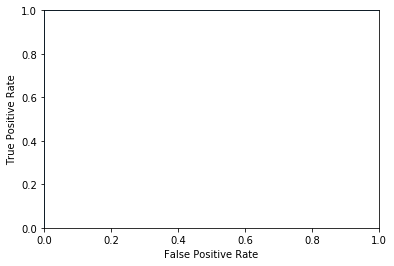

In [81]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr)

In [84]:
auc_score=roc_auc_score(Y_test,y_val_cat_prob)
auc_score

1.0